In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv(r'..\data\raw\tesla_deliveries_dataset_2015_2025.csv')
df

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722
...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273
2636,2019,7,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),6754


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [8]:
df.shape

(2640, 12)

In [ ]:
df.select_dtypes(include=[np.number]).shape[1]# numerical features

9

In [ ]:
df.select_dtypes(exclude=[np.number]).shape[1]# non numerical features

3

In [ ]:
df.count() # proves there are no null values 

Year                    2640
Month                   2640
Region                  2640
Model                   2640
Estimated_Deliveries    2640
Production_Units        2640
Avg_Price_USD           2640
Battery_Capacity_kWh    2640
Range_km                2640
CO2_Saved_tons          2640
Source_Type             2640
Charging_Stations       2640
dtype: int64

In [15]:
df.nunique()

Year                      11
Month                     12
Region                     4
Model                      5
Estimated_Deliveries    2401
Production_Units        2430
Avg_Price_USD           2638
Battery_Capacity_kWh       5
Range_km                 219
CO2_Saved_tons          2599
Source_Type                3
Charging_Stations       2389
dtype: int64

In [17]:
df.columns

Index(['Year', 'Month', 'Region', 'Model', 'Estimated_Deliveries',
       'Production_Units', 'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km',
       'CO2_Saved_tons', 'Source_Type', 'Charging_Stations'],
      dtype='object')

In [20]:
df=df.drop(columns=['Source_Type','Region'])

In [32]:
df = df.drop(columns=["Unnamed: 0"])
df

KeyError: "['Unnamed: 0'] not found in axis"

In [24]:
df=df.drop_duplicates(keep='first')

In [25]:
df.shape

(2640, 10)

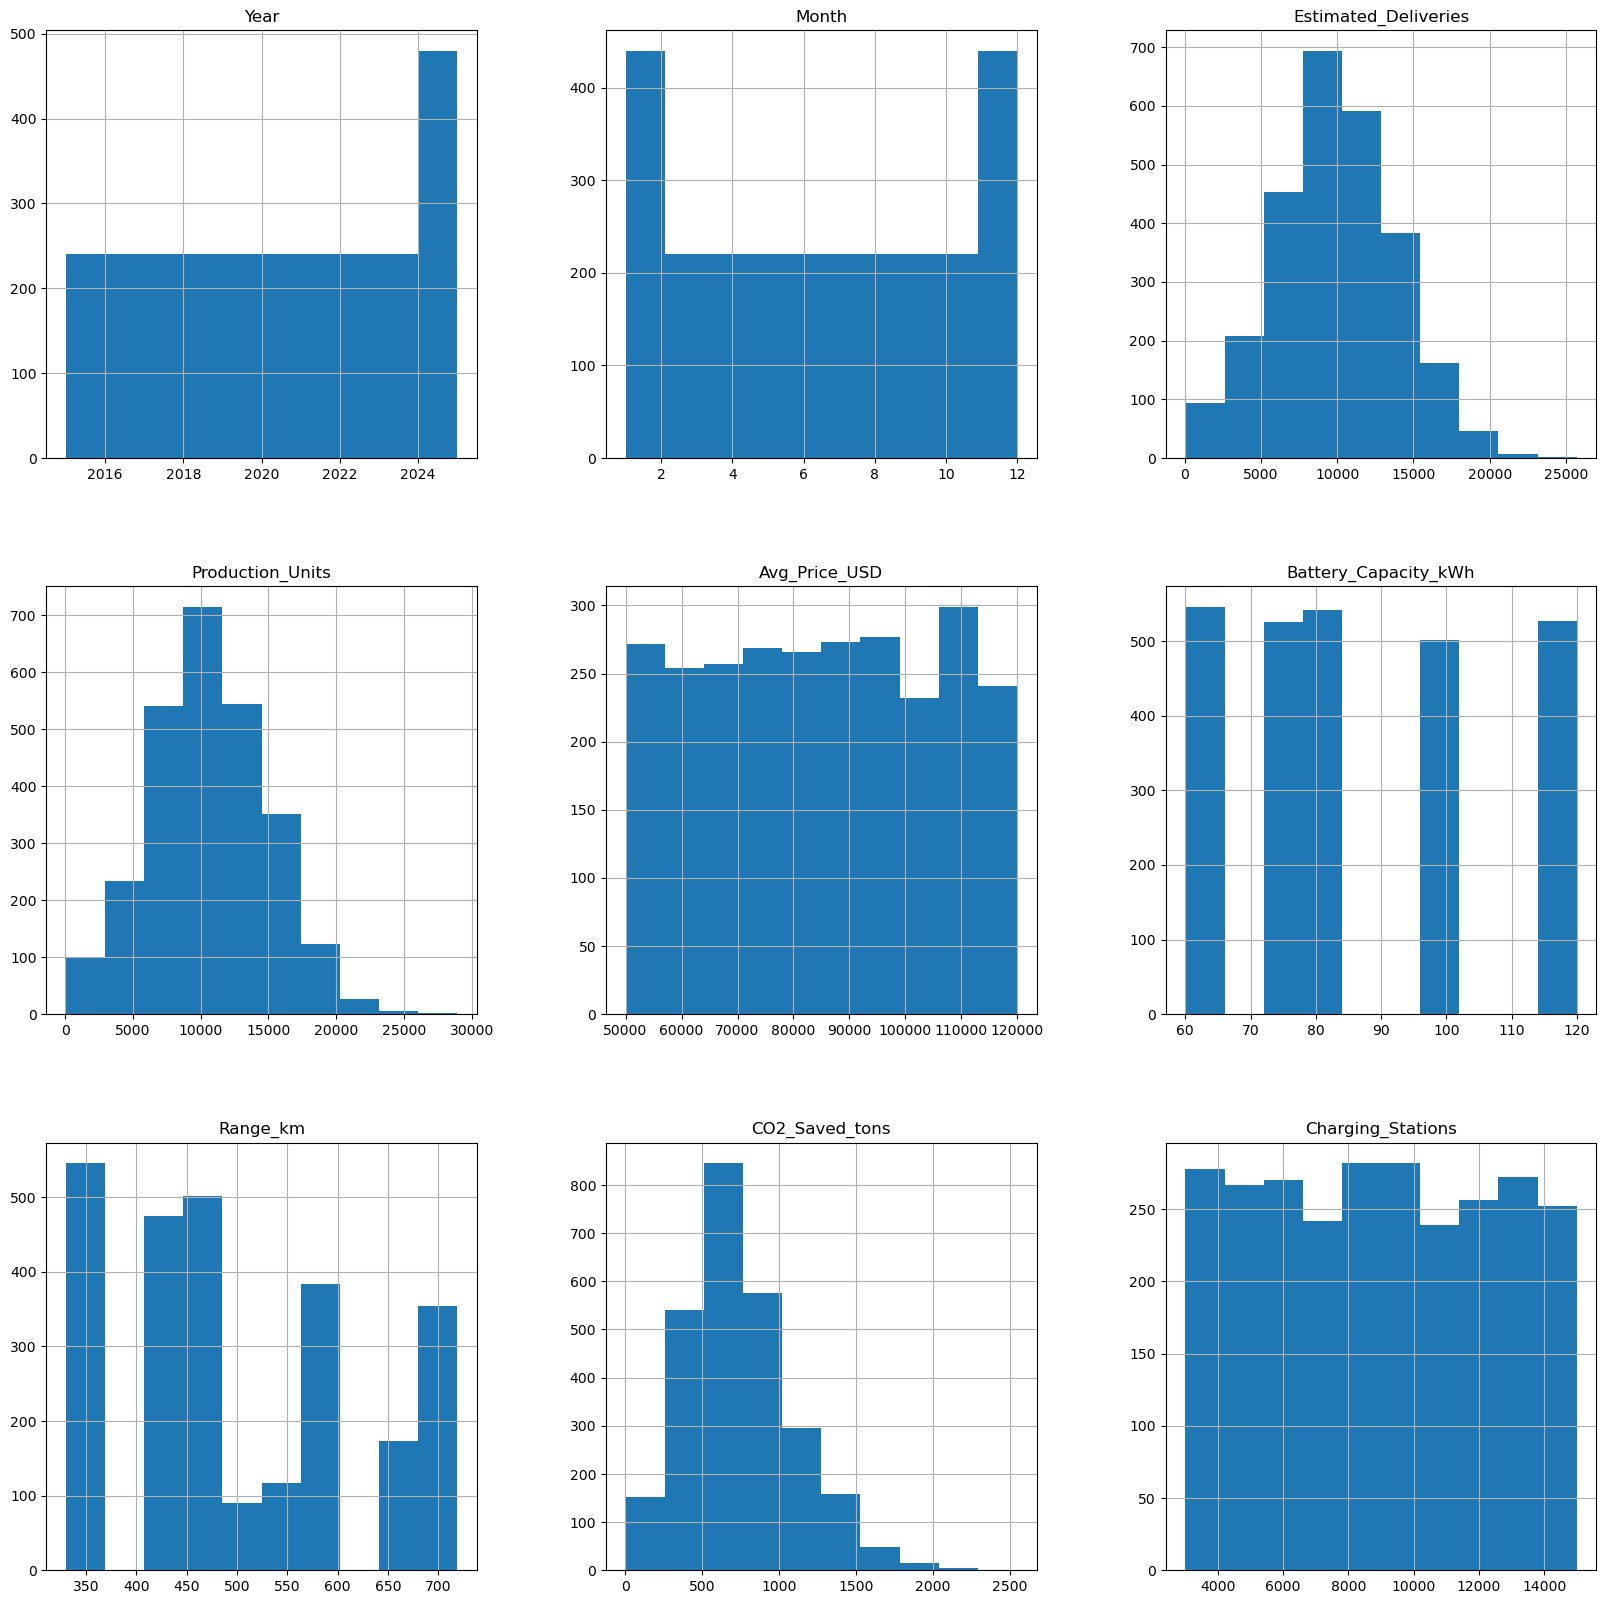

<Figure size 640x480 with 0 Axes>

In [30]:
from pathlib import Path
numeric_feature = df.select_dtypes(include = [np.number])
c_data = numeric_feature.copy()
c_data.hist(figsize = (20,20))
plt.show()
Path('artifacts').mkdir(exist_ok=True)
plt.savefig("./artifacts/histograms.png")

In [ ]:
df.drop(columns='')

,Year,Month,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Charging_Stations
0,2023,5,Model S,17646,17922,92874.27,120,704,1863.42,12207
1,2015,2,Model X,3797,4164,62205.65,75,438,249.46,7640
2,2019,1,Model X,8411,9189,117887.32,82,480,605.59,14071
3,2021,2,Model 3,6555,7311,89294.91,120,712,700.07,9333
4,2016,12,Model Y,12374,13537,114846.78,120,661,1226.88,8722
...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Model Y,13488,14333,113771.10,120,719,1454.68,4273
2636,2019,7,Model S,18300,18407,81889.67,82,487,1336.81,9833
2637,2019,9,Model S,13291,14839,97139.38,100,580,1156.32,13709
2638,2020,5,Cybertruck,3471,3714,69990.57,60,358,186.39,6754
